In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# From the linear_model class in
# the sklearn module import LinearRegression
# function.
from sklearn.linear_model import LinearRegression

# import the train_test_split functionality
# in order to split the dataframe into
# training and test sets
from sklearn.model_selection import train_test_split

# import mean_squared_error and math in order 
# to compute the Root Mean Squared Error
from sklearn.metrics import mean_squared_error
import math
%matplotlib inline

# Load the dataset into a DataFrame
iris_df = pd.read_csv('Iris.csv')

# view the first 5 row of the DataFrame
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# view the shape of the DataFrame
iris_df.shape

(150, 6)

The DataFrame contains 150 records and 6 fields. Let's view the dtypes contained in each field.

In [3]:
# Use info() to view the dtypes of each field
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# View the unique species contained in the 
# DataFrame by using the unique() function.
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

The DataFrame contains 3 different species of the Iris flower, the length and width of the sepals and petals of each flower.
The independent variables are SepalLengthcm, SepalWidthcm, PetalLengthcm and PetalWidthcm, these fields will be our input values. The dependent variable is  Species beacuase it is explianed by the lenght and width of the sepals and petals of a flower.

In [5]:
# Assign the independent variables to x
# We do not need the values contained in 
# the Id and Species columns.
# We will have 4 variables for multiple regression.
X = iris_df.drop(['Id', 'Species'], axis =1).values

# Assign the dependent variable to y
# Assign 'Species' to y
y = iris_df['Species'].values

In [21]:
# convert the species from strings to numbers
# See, https://www.sharpsightlabs.com/blog/numpy-unique/
# I want to operate on the y array
# If return_inverse is True 
# np.unique will return the indices of 
# all the values in the array

# np.unique outputs two arrays
# one with the unique values
# and the other with the indices of each 
# value in the array.
# We want to extract the indices of each value
# and assign it to y.
y_new = np.unique(y, return_inverse= True)[1]
y_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [7]:
# Split the DataFrame into testing and trainint set
# The test-size is 0.2, 20% of the data will be used
# as test samples

# The y-new array is ordered such that we have one species
# from index 0 to 49, the next at 50 to 99 and the last one
# from 100 to 150.
y_ordered = np.unique(y, return_index=True)[1]
y_ordered


array([  0,  50, 100], dtype=int64)

In [8]:
# Therefore set shuffle= True to distribute the labels randomly
# between the training and testing sets

# Use the stratify parameter in order to have, 
# as close as possible, the same proportion 
# of labels represented in both
# the training and test set.
X_train,X_test,y_train,y_test = train_test_split(X, y_new, test_size = 0.2, shuffle= True, stratify = y)

In [9]:
# return the trained and test test of 
# the y variable.
print(y_train)
print(y_test)

[1 0 0 2 2 2 1 0 2 2 2 0 0 2 0 0 0 1 2 2 0 2 2 0 1 0 2 1 0 2 0 1 1 2 2 1 0
 1 2 0 1 2 1 1 1 0 0 0 0 2 0 2 2 2 2 1 1 1 2 2 2 1 1 0 1 0 0 2 1 0 1 2 0 1
 1 2 1 2 0 0 1 2 1 1 2 2 1 1 0 0 0 2 0 1 0 1 2 1 2 1 2 1 1 0 0 0 0 1 2 1 2
 0 0 1 1 2 0 0 1 2]
[1 0 1 0 0 1 2 1 0 2 0 2 0 2 0 2 1 1 0 2 2 2 1 2 1 1 0 0 1 2]


It is important to have 'X_train, X_test,y_train, y_test' in the right order so that y_train and y_test are assigned the correct array after implementing the train_test_split method. The two arrays returned above indicate that the data in the trained set is represented in a proportion  in the test set.

In [10]:
# Call the LinearRegression() method from Scikit-Learn
linear_model = LinearRegression()

In [11]:
# Fit the model using the training data
linear_model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Using model.intercept_
# We can obtain the y-intercept.
# The intercept is the value of the dependent variable
# when all independent variables are set to zero.
# See, https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
print('Intercept: \n',linear_model.intercept_)

Intercept: 
 0.11389917525441529


In [13]:
# Using model.coef_
# we can obtain the coeficients of our independent
# variables. 
print('Coefficients: \n', linear_model.coef_)

Coefficients: 
 [-0.07474882 -0.06508355  0.20898851  0.60411355]


The array returned above contains coefficients for each of the 4 variables in the same order that we assigned the fields for our X variable above. Meaning -0.0785 is the coefficient for SepalLengthcm, -0.0698 is the coeficient for SepalWidthcm, 0.2006 for PetalLengthcm, 0.6426 for PetalWidthcm. The coefficients for sepal length and width have a negative impact on determining the species of a flower. The coefficients for petal length and width have a positive weighting on determining the species of a flower.

In [14]:
# Using the predict() method
# we can predict the y values based on 
# our model. The predict() method will return
# predictions of y given the test data of 
# our X variables
y_pred = linear_model.predict(X_test)
y_pred

array([ 1.2102939 , -0.08267213,  1.17439017, -0.04340853, -0.08023492,
        1.0052614 ,  2.03153128,  0.86146177,  0.00855017,  1.80116965,
       -0.08023492,  1.94717156, -0.02129425,  1.85817935, -0.0109749 ,
        1.66962241,  1.14779748,  0.88520508,  0.17524173,  1.69383301,
        1.71197938,  1.55236243,  1.01217702,  1.7182876 ,  1.32658736,
        1.16218798, -0.03492534, -0.16774312,  1.09526827,  1.67303105])

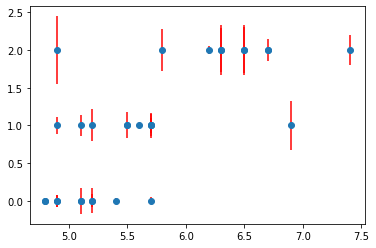

In [15]:
# Plot the difference between the predicted 
# values and the actual values by means of 
# an error plot.
# Plot the error for sepal length
plt.errorbar(X_test[:,0], y_test, yerr=(y_test - y_pred), fmt='o', ecolor="red");

The error bars seem to be shorter for the species Sertosa than the other species. The model is likely to be more accurate when predicting the species Sertosa. The error bars are much longer for the Virginica species.

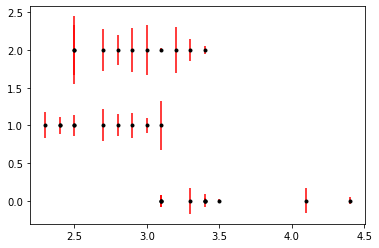

In [16]:
# Plot the error bar for sepal width
# we need to access all the values at 
# index 1 of the X variables
plt.errorbar(X_test[:,1], y_test, yerr=(y_test - y_pred), fmt = '.k', ecolor= 'red');

The error bars are also shorter for the species Sertosa and longer for the Virginica species.

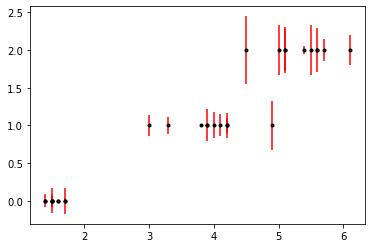

In [17]:
# plot the error bar for petal length
# We need the values in the colum with
# index 2 in X
plt.errorbar(X_test[:,2], y_test, yerr=(y_test - y_pred), fmt='.k', ecolor="red");

When predicting the species using the petal length of the flower, the error bars are also shorter for the species Sertosa and longer for the Virginica species.

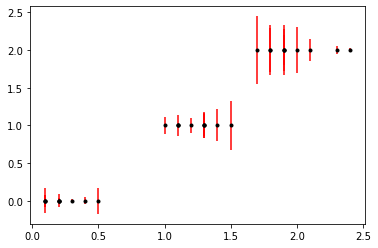

In [18]:
# plot the error bar for petal width
# We need to use the x values in the 
# column indexed at 3 in X.
plt.errorbar(X_test[:,3], y_test, yerr=(y_test - y_pred), fmt='.k', ecolor="red");

When predicting the species using the petal width of the flower, the error bars are also shorter for the species Sertosa and longer for the Virginica species.

In order to find out the accuracy of our regression model, we use the model to predict values of y using trained values of x. If our model is accurate and the predicted y values are equal to the actual y values then the model will have no error. However, if there is a difference between the actual y values and the predicted values then the regression model has an error. In order to measure how bad the error is, in this task i will compute score for the model using Root Mean Squared Error (RMSE) method. To calculate the root mean squared error we have to calculate the mean squared error (MSE) and then calculate the square root of the MSE. 

In [19]:
# I want to see how well my model can 
# predict the y values given my X_test values

# Use np.subtract function to calculate the difference
# between each actual y value and predicted y value

diff = np.subtract(y_pred, y_test)

# Use np.square function to square the above 
# differences
sq = np.square(diff)

# calculate the mean of the squares using 
# the mean() function
MSE = sq.mean()

# calculate the square root of MSE to 
# obtain RMSE
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.1905518356638924


The RMSE score tells us the average distance between the predicted values from our model and the actual values. A high score indicates that our regression model did not fit the data. Based on multiple answers given to the question 'What is the acceptable value of RMSE?', the lower the RMSE the more accurate the model will predict values.

Bibliography

https://www.britannica.com/science/flower

https://stackabuse.com/multiple-linear-regression-with-pyth

https://medium.com/analytics-vidhya/linear-regression-using-iris-dataset-hello-world-of-machine-learning-b0feecac9cc1

https://www.askpython.com/python/examples/rmse-root-mean-square-error

https://www.statology.org/what-is-a-good-rmse/

https://www.researchgate.net/post/Whats-the-acceptable-value-of-Root-Mean-Square-Error-RMSE-Sum-of-Squares-due-to-error-SSE-and-Adjusted-R-square#:~:text=Based%20on%20a%20rule%20of,more%20is%20acceptable%20as%20well.